In [102]:
import math

from utility import *
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import f_oneway

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [103]:
data = load_data("../data/student-renew-data.csv")
data.head()

,sex,area_type,city_level,activity_level1_class_name,leads_type,user_quality,is_age_appropriate,is_exam_before,is_schedule,is_attend,...,is_reply_introduction,is_call,is_60s_call,package_begin_days,package_begin_date,ending_time,renew_time,is_renew,ending_type,etl_time
0,女,海外,港澳台,投放,流量,3,1,0,1,1,...,1,0,0,258,2021-05-19,2022-02-19,NaN,0,实际结课,2022-02-01
1,未知,国内,其他城市,常规转介绍,转介绍后端,3,1,0,1,1,...,1,1,1,258,2021-05-19,2022-03-15,NaN,0,实际结课,2022-02-01
2,男,海外,亚洲,常规转介绍,转介绍后端,3,1,0,1,1,...,1,0,0,252,2021-09-22,2022-08-24,2022-06-17,1,实际结课,2022-06-01
3,女,国内,二类城市,常规转介绍,转介绍后端,3,1,0,1,1,...,1,1,1,90,2021-11-03,2022-04-29,NaN,0,退费结课,2022-02-01
4,男,海外,北美,常规转介绍,转介绍后端,3,1,0,1,1,...,1,0,0,14,2022-03-18,2022-05-12,NaN,0,退费结课,2022-04-01


## 一、特征分类
- 离散型数据
- 连续性数据

In [104]:
category_features = ["area_type","city_level","leads_type","is_exam_before"]
numeric_features =["prepare_rate","one_attend_rate","homework_rate"]
label = ["is_renew"]

In [105]:
data = data[category_features+numeric_features+label]
data.head()

,area_type,city_level,leads_type,is_exam_before,prepare_rate,one_attend_rate,homework_rate,is_renew
0,海外,港澳台,流量,0,0.548387,0.903226,0.178571,0
1,国内,其他城市,转介绍后端,0,0.096154,0.711538,0.617021,0
2,海外,亚洲,转介绍后端,0,0.942857,1.000000,1.000000,1
3,国内,二类城市,转介绍后端,0,0.636364,0.727273,0.727273,0
4,海外,北美,转介绍后端,0,0.000000,1.000000,1.000000,0


In [106]:
# 查看离散型数据的值
for _ in category_features:
    print(data[_].unique())

['海外' '国内']
['港澳台' '其他城市' '亚洲' '二类城市' '北美' '一类城市' '四类城市' '澳洲' '三类城市' '海外其他' '欧洲' '未知']
['流量' '转介绍后端' '转介绍前端' '未知' '转介绍-裂变']
[0 1]


In [107]:
# 查看连续型数据的值
data[numeric_features].describe().T

,count,mean,std,min,25%,50%,75%,max
prepare_rate,78438.0,0.546186,0.282682,0.0,0.322222,0.581017,0.780822,1.0
one_attend_rate,78438.0,0.840743,0.155082,0.0,0.781818,0.879310,0.947368,1.0
homework_rate,78438.0,0.605686,0.314355,0.0,0.352941,0.666667,0.892857,1.0


## 二、计算相关性和显著性
1、对于连续型和连续型特征，用Pearson计算他们的线性相关性以及检验两组特征的数据是否显著
2、对应连续型和标签(离散型)，用方差分析检验他们是否相关
3、对应离散型特征和标签(离散型)，用卡方检验他们是否相关

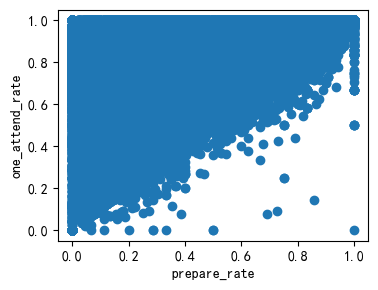

In [108]:
# 绘制两个特征的散点图
def plot_scatter(data,feature,label):
    plt.figure(figsize=(4,3))
    plt.scatter(data[feature],data[label])
    plt.xlabel(feature)
    plt.ylabel(label)
    plt.show()
plot_scatter(data,"prepare_rate","one_attend_rate")

### 1、对于连续型和连续型特征，用Pearson计算他们的线性相关性以及检验两组特征的数据是否显著

prepare_rate和one_attend_rate的Pearson相关性：0.43848706623851175,显著性近似于0
prepare_rate和homework_rate的Pearson相关性：0.4650507979098916,显著性近似于0
one_attend_rate和prepare_rate的Pearson相关性：0.43848706623851175,显著性近似于0
one_attend_rate和homework_rate的Pearson相关性：0.4004874879171616,显著性近似于0
homework_rate和prepare_rate的Pearson相关性：0.4650507979098916,显著性近似于0
homework_rate和one_attend_rate的Pearson相关性：0.4004874879171616,显著性近似于0


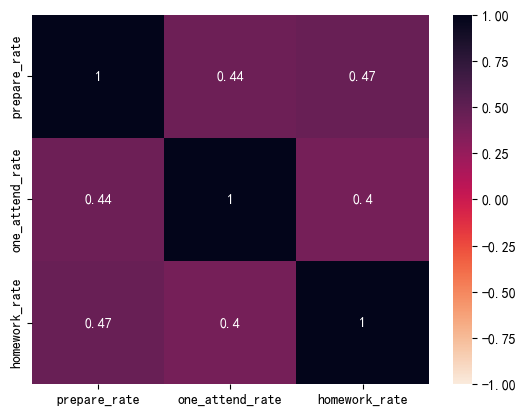

In [109]:
# 计算Pearson相关性
for i in numeric_features:
    for j in numeric_features:
        if i!=j:
            corr,_ = stats.pearsonr(data[i],data[j])
            if _==0:
                print(f"{i}和{j}的Pearson相关性：{corr},显著性近似于0")
            else:
                print(f"{i}和{j}的Pearson相关性：{corr},显著性(取log)：{math.log(_,10)}")
# 计算数值型和数值型的相关性矩阵
corr = data[numeric_features].corr(method="pearson")
sns.heatmap(corr, vmin=-1, vmax=1,annot=True,cmap="rocket_r")
plt.show()

### 2、对应连续型和标签(离散型)，用方差分析检验他们是否相关

In [110]:
# 用方差分析检验数值型变量和标签是否相关
def anova_test(data,feature,label):
    groups = data.groupby(label)[feature].apply(list)
    stat,p = f_oneway(*groups)
    if p==0:
        print(f"显著性近似于0, {feature}和{label}相关")
    elif p<0.05:
        print(f"p值(取log)={math.log(p,10)}, {feature}和{label}相关")
    else:
        print(f"p值(取log)={math.log(p,10)}, {feature}和{label}不相关")
print(f"p=0.05时的log值：{math.log(0.05,10)}")
anova_test(data,"homework_rate","is_renew")
anova_test(data,"one_attend_rate","is_renew")
anova_test(data,"prepare_rate","is_renew")

p=0.05时的log值：-1.301029995663981
显著性近似于0, homework_rate和is_renew相关
显著性近似于0, one_attend_rate和is_renew相关
p值(取log)=-232.37185588599596, prepare_rate和is_renew相关


### 3、对应离散型特征和标签(离散型)，用卡方检验他们是否相关

In [111]:
# 用卡方检验离散型变量和标签是否相关
from scipy.stats import chi2_contingency
def chi2_test(data,feature,label):
    table = pd.crosstab(data[feature],data[label])
    stat,p,dof,expected = chi2_contingency(table)
    # print(f"stat:{stat},p:{p},dof:{dof},expected:{expected}")
    if p==0:
        print(f"显著性近似于0, {feature}和{label}相关")
    elif p<0.05:
        print(f"p值(取log)={math.log(p,10)}, {feature}和{label}相关")
    else:
        print(f"p值(取log)={math.log(p,10)}, {feature}和{label}不相关")
print(f"p=0.05时的log值：{math.log(0.05,10)}")
chi2_test(data,"area_type","is_renew")
chi2_test(data,"city_level","is_renew")
chi2_test(data,"leads_type","is_renew")
chi2_test(data,"is_exam_before","is_renew")

p=0.05时的log值：-1.301029995663981
p值(取log)=-4.5454270957953655, area_type和is_renew相关
p值(取log)=-32.69007167952207, city_level和is_renew相关
p值(取log)=-1.894641876200759, leads_type和is_renew相关
p值(取log)=-39.904144522045335, is_exam_before和is_renew相关
